In [46]:
!pip install earthpy gdal

In [47]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')


{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [48]:
%cd /Users/bertrandlobo/Library/Mobile Documents/com~apple~CloudDocs/Portfolio/Satellite_imagery_Analysis/PART2/DATA

/Users/bertrandlobo/Library/Mobile Documents/com~apple~CloudDocs/Portfolio/Satellite_imagery_Analysis/PART2/DATA


In [49]:
S_sentinel_bands = glob("/Users/bertrandlobo/Library/Mobile Documents/com~apple~CloudDocs/Portfolio/Satellite_imagery_Analysis/PART2/DATA/Munich_satellitedata/*B?*.tiff")
S_sentinel_bands.sort()
S_sentinel_bands

['/Users/bertrandlobo/Library/Mobile Documents/com~apple~CloudDocs/Portfolio/Satellite_imagery_Analysis/PART2/DATA/Munich_satellitedata/2022-03-22-00:00_2022-03-22-23:59_Sentinel-2_L2A_B01_(Raw).tiff',
 '/Users/bertrandlobo/Library/Mobile Documents/com~apple~CloudDocs/Portfolio/Satellite_imagery_Analysis/PART2/DATA/Munich_satellitedata/2022-03-22-00:00_2022-03-22-23:59_Sentinel-2_L2A_B02_(Raw).tiff',
 '/Users/bertrandlobo/Library/Mobile Documents/com~apple~CloudDocs/Portfolio/Satellite_imagery_Analysis/PART2/DATA/Munich_satellitedata/2022-03-22-00:00_2022-03-22-23:59_Sentinel-2_L2A_B03_(Raw).tiff',
 '/Users/bertrandlobo/Library/Mobile Documents/com~apple~CloudDocs/Portfolio/Satellite_imagery_Analysis/PART2/DATA/Munich_satellitedata/2022-03-22-00:00_2022-03-22-23:59_Sentinel-2_L2A_B04_(Raw).tiff',
 '/Users/bertrandlobo/Library/Mobile Documents/com~apple~CloudDocs/Portfolio/Satellite_imagery_Analysis/PART2/DATA/Munich_satellitedata/2022-03-22-00:00_2022-03-22-23:59_Sentinel-2_L2A_B05_(Ra

In [50]:
l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))

In [51]:
arr_st = np.stack(l)

In [52]:
arr_st.shape


(12, 554, 705)

In [53]:
#PLOTTING 12 bands of the data 

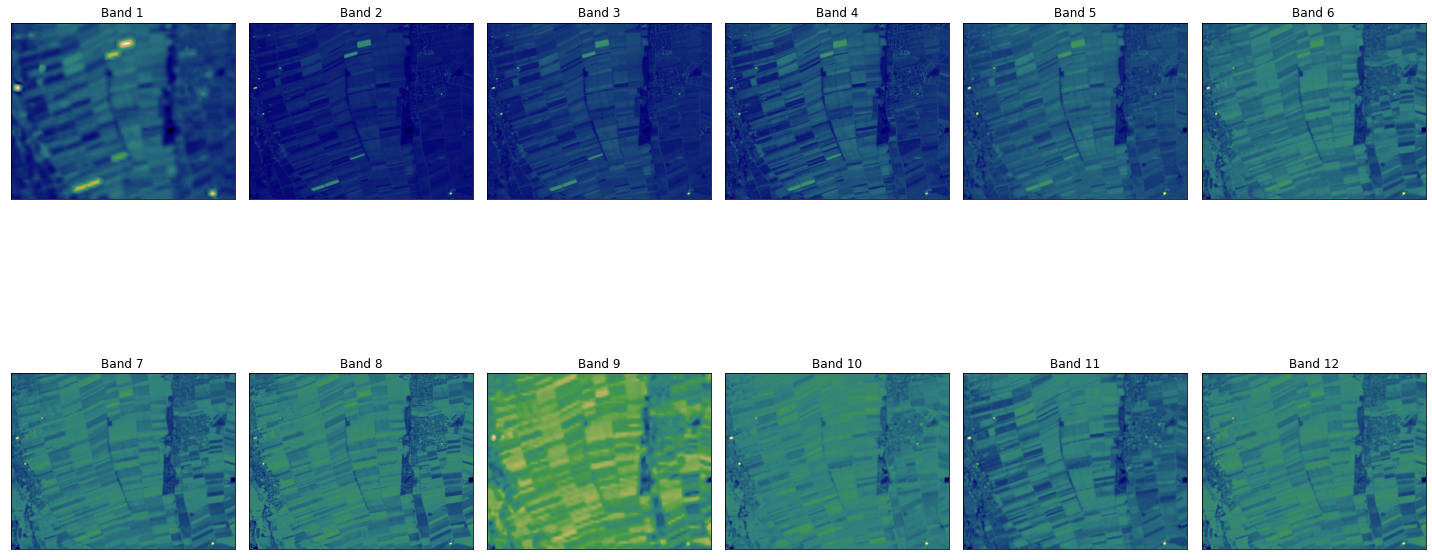

In [54]:
ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 12), cols = 6, cbar = False)
plt.show()

In [55]:
# PLOTTING RGB 


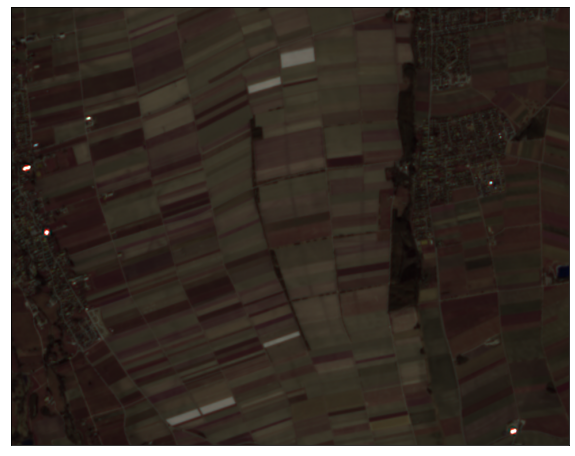

In [56]:
rgb = ep.plot_rgb(arr_st, 
                  rgb=(4,3,2), 
                  figsize=(10, 16), 
                  # title='RGB Composite Image'
                  )

plt.show()           

In [57]:
#RGB image with applied stretch

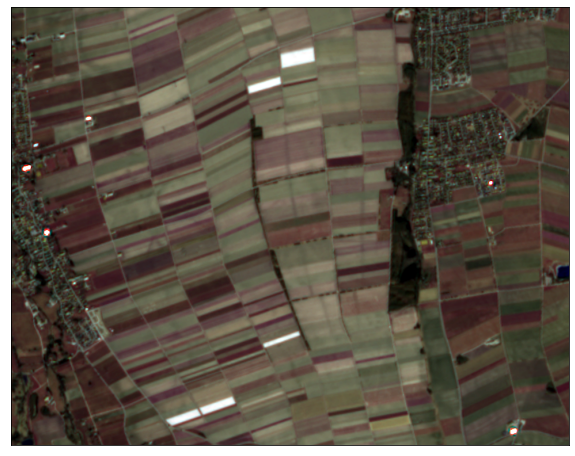

In [58]:
ep.plot_rgb(
    arr_st,
    rgb=(4, 3, 2),
    stretch=True,
    str_clip=0.2,
    figsize=(10, 16),
    # title="RGB Composite Image with Stretch Applied",
)

plt.show()

In [59]:
# HISTOGRAM OF THE BANDS 

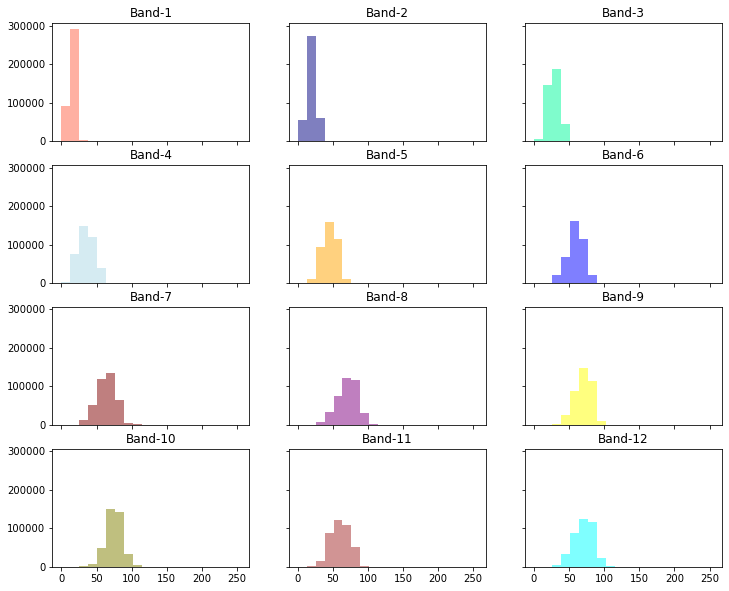

In [60]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']

ep.hist(arr_st, 
         colors = colors,
        title=[f'Band-{i}' for i in range(1, 13)], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 10)
        )

plt.show()

In [61]:
# VEGETATION AND SOIL INDICES 

# 1.NDVI = Normalized Difference Vegetation Index 
# NDVI = ((NIR - Red)/(NIR + Red))
# where NIR = Near Infrared band 
#        Red= Red band 


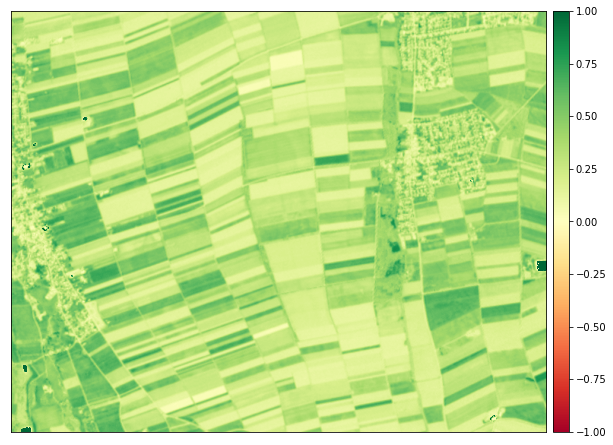

In [62]:
ndvi = es.normalized_diff(arr_st[7], arr_st[3])

ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

In [63]:
# 2. Soil-Adjusted Vegetation Index (SAVI)
# SAVI = ((NIR - red)/(NIR + Red + L)) * (1 + L)

# Where NIR = Near Infrared 
#       red = red band 
#.      L = green vegetation cover (DEFINED)

In [64]:
L = 0.5

savi = ((arr_st[7] - arr_st[3]) / (arr_st[7] + arr_st[3] + L)) * (1 + L)

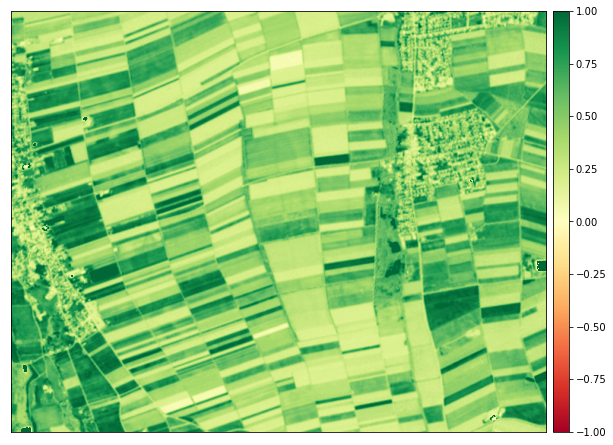

In [65]:
ep.plot_bands(savi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()



In [66]:
# 3. Visible atmospheric resistant index (VARI)

#  VARI = ((Green - Red)/(Green + Red - Blue))

# where green = pixel values from band green
#.      red = pixel values from red band
#.      blue = Values of pixels from blue band 


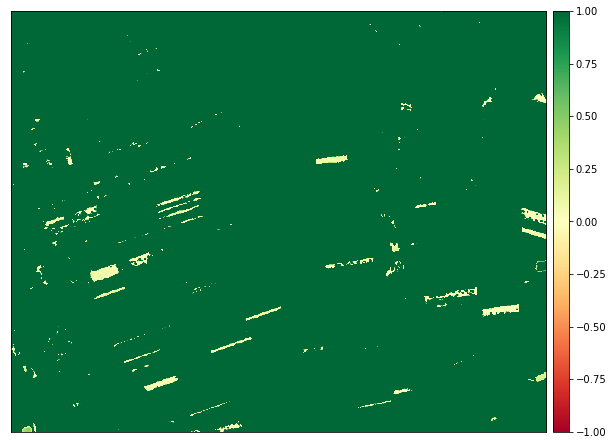

In [67]:
vari = (arr_st[2] - arr_st[3])/ (arr_st[2] + arr_st[3] - arr_st[1])

ep.plot_bands(vari, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()


In [ ]:
# WATER INDICES 


# Modified Normalized difference water index (MNDWI)

# MNDWI = MNDWI = (Green - SWIR) / (Green + SWIR)
#      Green = pixel values from the green band
#.     SWIR = pixel values from the short-wave infrared band

In [68]:
mndwi = es.normalized_diff(arr_st[2], arr_st[10])

/Users/bertrandlobo/opt/anaconda3/lib/python3.9/site-packages/earthpy/spatial.py:109: Warning: Divide by zero produced infinity values that will be replaced with nan values
  warnings.warn(


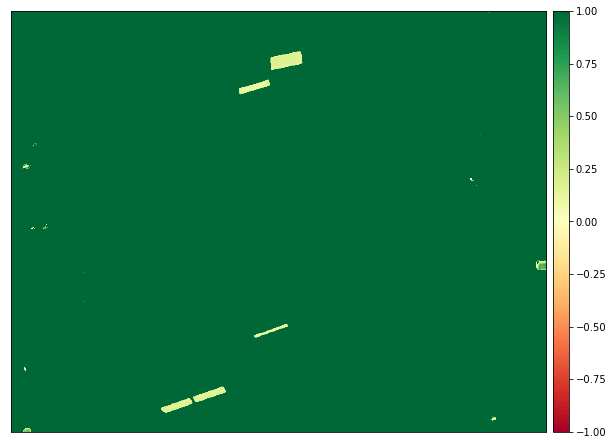

In [69]:
ep.plot_bands(mndwi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

In [70]:
# Normalized Differene Moisture Index (NDMI)

#  NDMI = (NIR - SWIR1)/(NIR + SWIR1)
#.  NIR = pixel values from the near infrared band
#.  SWIR1 = pixel values from the short-wave infrared 1 band


In [73]:
ndmi = es.normalized_diff(arr_st[7], arr_st[10])

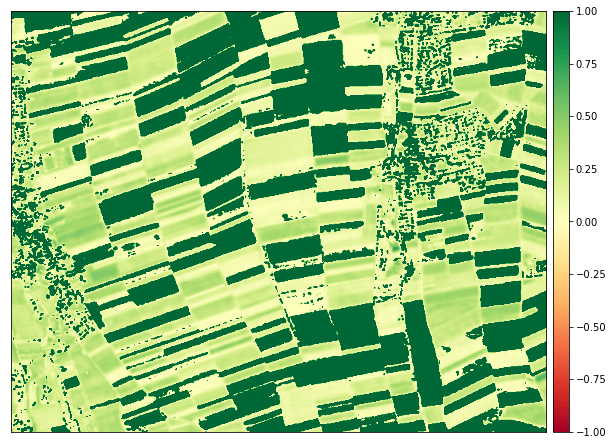

In [74]:
ep.plot_bands(ndmi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

In [ ]:
# GEOLOGY INdices 

# 1. Felsic Minerals 

# 